# PyTorch

Открытый фреймворк для построения и использования динамических графов вычислений и глубокого обучения (вспоминаем, что нейросеть -- это вычислительный граф)

Альтернативы: TensorFlow, JAX, Caffe

Изначально разрабатывался FaceBook's AI Research Lab (FAIR)

Вместе с функционалом Python удобен для экспериментов и разработки (минимум кода при максимуме возможностей)

Наиболее важные для DL возможности: автоматическое дифференцирование, вычисления на базе многомерных матриц (тензоров) - очень похож на numpy, поддержка динамических вычислительных графов (создаются при работе), поддержка вычислений на GPU, есть полезные модули (например, torchvision).

Установка с официального сайта: [https://pytorch.org/get-started/locally/](https://pytorch.org/get-started/locally/).

In [1]:
# проверка версии Питона, Пайторча и проверка доступности видеокарты

import torch
from platform import python_version
print(python_version())
print(torch.__version__)
print(torch.cuda.is_available())

3.10.12
2.0.1+cu118
True


In [2]:
# использование Google-диска при работе в COLAB

from google.colab import drive
import pandas as pd

drive.mount("/content/gdrive", force_remount=True)

data_path = "/content/gdrive/My Drive/Colab Notebooks/deep_learning_data/"
train_ann_path = data_path + 'train.csv'

train_df = pd.read_csv(train_ann_path)
print(train_df.head())

# команды для bash пишутся с !
!ls /content/gdrive/My\ Drive/Colab\ Notebooks/deep_learning_data/

Mounted at /content/gdrive
   row_id     A0T0G0C10  A0T0G1C9  A0T0G2C8  A0T0G3C7  A0T0G4C6  A0T0G5C5  \
0       0 -9.536743e-07 -0.000010 -0.000043 -0.000114 -0.000200 -0.000240   
1       1 -9.536743e-07 -0.000010 -0.000043  0.000886 -0.000200  0.000760   
2       2 -9.536743e-07 -0.000002  0.000007  0.000129  0.000268  0.000270   
3       3  4.632568e-08 -0.000006  0.000012  0.000245  0.000492  0.000522   
4       4 -9.536743e-07 -0.000010 -0.000043 -0.000114 -0.000200 -0.000240   

   A0T0G6C4  A0T0G7C3  A0T0G8C2  ...  A8T0G1C1  A8T0G2C0  A8T1G0C1  A8T1G1C0  \
0 -0.000200 -0.000114 -0.000043  ... -0.000086 -0.000043 -0.000086 -0.000086   
1 -0.000200 -0.000114 -0.000043  ... -0.000086 -0.000043  0.000914  0.000914   
2  0.000243  0.000125  0.000001  ...  0.000084  0.000048  0.000081  0.000106   
3  0.000396  0.000197 -0.000003  ...  0.000151  0.000100  0.000180  0.000202   
4 -0.000200 -0.000114 -0.000043  ... -0.000086 -0.000043 -0.000086 -0.000086   

   A8T2G0C0  A9T0G0C1  A9T0G1

## Тензоры

Тензоры (torch.Tensor) - аналоги многомерных массивов пакета numpy, только могут располагаться на GPU (или поддерживать вычисления на нескольких CPU), могут быть элементами вычислительного графа и поддерживать автоматическое дифференцирование (об этом позже). Нейросеть -- это в каком-то смысле последовательность тензоров.

Это фундаментальная структура данных в Pytorch (с помощью неё будут храниться и обрабатываться объекты: тексты, сигналы изображения и батчи - наборы объектов).

Могут в многомерном матричном виде хранить данные определённого типа.

In [3]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # тензор на CPU

print(x,
      x.shape,  # размер тензора
      x.dtype,  # тип
      x.device,  # где лежит
      x.type(),  # тип
      x.dim(),  # размерность
      x.size(),  # размер; .shape и .size() одно и то же
      x.numel(),  # число элементов тензора
      sep='\n'
      )

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])
torch.int64
cpu
torch.LongTensor
2
torch.Size([2, 3])
6


In [4]:
x = torch.cuda.FloatTensor(2, 3)  # тензор на GPU
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In [5]:
# приведение типов

x = torch.IntTensor([1, 2]).float()
print(x, '\n')

x = torch.IntTensor([1, 2]).to(torch.float64)
print(x, '\n')

x = torch.IntTensor([1, 2]) + 0.0
print(x, '\n')

tensor([1., 2.]) 

tensor([1., 2.], dtype=torch.float64) 

tensor([1., 2.]) 



In [6]:
# пустой тензор
x = torch.empty(3, 5)
print(x, '\n')

# тензор из единиц
x = torch.ones(3, 5)
print(x, '\n')

# тензор из 3.14
x = torch.full((3, 5), 3.14, dtype=torch.float)
print(x, '\n')

# единичный тензор (с единицами на главной диагонали)
x = torch.eye(3, 5)
print(x, '\n')

# случайный тензор с элементами, равномерно распределёнными на [0, 1]
torch.manual_seed(123)
x = torch.rand(3, 5)
print(x, '\n')

# случайный тензор с нормально распределёнными элементами
torch.manual_seed(123)
x = torch.randn(3, 5)
print(x, '\n')

# случайный тензор с числами от 2 до 4 (не включая 4)
torch.manual_seed(123)
x = torch.randint(2, 4, (3, 5))
print(x, '\n')

tensor([[2.1826e-38, 3.1616e-41, 1.0525e-38, 3.1616e-41, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4013e-45, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.1084e-44]]) 

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]) 

tensor([[3.1400, 3.1400, 3.1400, 3.1400, 3.1400],
        [3.1400, 3.1400, 3.1400, 3.1400, 3.1400],
        [3.1400, 3.1400, 3.1400, 3.1400, 3.1400]]) 

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.]]) 

tensor([[0.2961, 0.5166, 0.2517, 0.6886, 0.0740],
        [0.8665, 0.1366, 0.1025, 0.1841, 0.7264],
        [0.3153, 0.6871, 0.0756, 0.1966, 0.3164]]) 

tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969],
        [ 0.2093, -0.9724, -0.7550,  0.3239, -0.1085],
        [ 0.2103, -0.3908,  0.2350,  0.6653,  0.3528]]) 

tensor([[2, 3, 2, 2, 2],
        [2, 2, 3, 3, 2],
        [3, 3, 2, 3, 2]]) 



In [7]:
# аналог np.arange
x = torch.arange(0, 10, 2)
print(x, '\n')

# аналог np.linspace
x = torch.linspace(0, 10, 3)
print(x, '\n')

# аналог np.logspace
x = torch.logspace(0, 1, 3)
print(x, '\n')

# сделать тензоры по образцу (использовать такой же тип и размеры)
print(torch.empty_like(x), '\n')
print(torch.zeros_like(x), '\n')
print(torch.ones_like(x), '\n')

tensor([0, 2, 4, 6, 8]) 

tensor([ 0.,  5., 10.]) 

tensor([ 1.0000,  3.1623, 10.0000]) 

tensor([9.7306e-39, 3.1616e-41, 1.9549e-38]) 

tensor([0., 0., 0.]) 

tensor([1., 1., 1.]) 



In [8]:
# индексация аналогичная принятой в Питоне (в частности в numpy):
# [start:end:step]

x = torch.randint(0, 10, (2, 5))

# есть тонкий момент: вектор с размерностью n или тензор с размерностью 1 на n
# например целевые значения задаются матрицей размера 1 на n, а не n-мерным
# вектором
print(x, '\n')
print((x[0], x[0, :], x[[0], :], x[:1, :]), '\n')
print((x[:, [1]], x[:, 1], x[:, -4]), '\n')

print('Это тензор 1x1: ', x[0, 0], '\n')
print('А это уже отдельный элемент: ', x[0, 0].item(), '\n')

tensor([[9, 4, 1, 3, 0],
        [0, 6, 5, 7, 9]]) 

(tensor([9, 4, 1, 3, 0]), tensor([9, 4, 1, 3, 0]), tensor([[9, 4, 1, 3, 0]]), tensor([[9, 4, 1, 3, 0]])) 

(tensor([[4],
        [6]]), tensor([4, 6]), tensor([4, 6])) 

Это тензор 1x1:  tensor(9) 

А это уже отдельный элемент:  9 



In [9]:
# копирование
# при использовании clone() копия остаётся в графе вычислений
# при использовании copy_() такого не происходит
# detach - убирает информацию, связанную с вычислительным графом, из объекта

a = torch.tensor([[1, 2], [3, 4]])

b = a.new_tensor(a)
b = a.clone().detach()
b = torch.empty_like(a).copy_(a)
b = torch.tensor(a)
b = a.detach().clone()  # лучше копировать так

<ipython-input-9-cdb08a1bda04>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  b = a.new_tensor(a)
<ipython-input-9-cdb08a1bda04>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(a)


In [10]:
# при транспонировании не происходит копирования (используется та же память)

xt = x.t()
x[0, 0] = 30
print('x: ', x, '\n')
print('xt: ', xt, '\n')

x:  tensor([[30,  4,  1,  3,  0],
        [ 0,  6,  5,  7,  9]]) 

xt:  tensor([[30,  0],
        [ 4,  6],
        [ 1,  5],
        [ 3,  7],
        [ 0,  9]]) 



In [11]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[2, 2], [2, 2]])

z = torch.stack((x, y), dim=0)  # состыковка тензоров (по умолчанию dim=0)
print(z, z.shape, sep='\n')

tensor([[[1, 2],
         [3, 4]],

        [[2, 2],
         [2, 2]]])
torch.Size([2, 2, 2])


In [12]:
x, y = z.unbind(dim=0)  # разстыковка тензоров
print(x, y, sep='\n')

tensor([[1, 2],
        [3, 4]])
tensor([[2, 2],
        [2, 2]])


In [13]:
# конкатенация по 0 и 1 размерностям (отличие от состыковки в том, что
# используются уже существующие размерности)

x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[2, 2], [2, 2]])
print(torch.cat([x, y], axis=1), '\n')
print(torch.cat([x, y], axis=0), '\n')

tensor([[1, 2, 2, 2],
        [3, 4, 2, 2]]) 

tensor([[1, 2],
        [3, 4],
        [2, 2],
        [2, 2]]) 



In [14]:
# создание фиктивной размерности - указывается, в какую позицию вставлять
# фиктивную

x = torch.tensor([[1, 2], [3, 4]])
print(x.unsqueeze(dim=0).shape,
      x.unsqueeze(dim=1).shape,
      x.unsqueeze(dim=2).shape)
print(x[None, :, :].shape,
      x[:, None, :].shape,
      x[:, :, None].shape)

torch.Size([1, 2, 2]) torch.Size([2, 1, 2]) torch.Size([2, 2, 1])
torch.Size([1, 2, 2]) torch.Size([2, 1, 2]) torch.Size([2, 2, 1])


In [15]:
# удаление единичных размеров
torch.empty(3, 1, 2, 1).squeeze().shape

torch.Size([3, 2])

In [16]:
# как хранятся в памяти двухмерные тензоры? Что такое смежность тензора?
h = torch.rand((10000, 10000))

In [17]:
%%time
s = torch.sum(h, axis=1)  # суммы строк быстрее, чем суммы столбцов

CPU times: user 36.8 ms, sys: 0 ns, total: 36.8 ms
Wall time: 35.5 ms


In [18]:
%%time
s = torch.sum(h, axis=0)  # суммы столбцов медленнее, чем суммы строк

CPU times: user 81.9 ms, sys: 0 ns, total: 81.9 ms
Wall time: 83.3 ms


In [19]:
x = torch.randn(3, 2)
print(x.is_contiguous())  # смежный
y = torch.transpose(x, 0, 1)  # в общем случае транспонирование -
# это перестановка размерностей
print(y.is_contiguous())  # несмежный
x[0, 0] = 101  # но они делят память
print(y[0, 0])

True
False
tensor(101.)


In [20]:
# Можно менять представление тензора с помощью view
# Это изменение размеров, но реально данные не перемещаются
# Pytorch просто запоминает, что тензор, заданный элементами,
# лежащими в определённой области, имеет другой размер
# view работает только с contiguous тензорами

x = torch.arange(4*10*2).view(4, 10, 2)
y = x.permute(2, 0, 1)

print('Смежность:', x.is_contiguous())
print('Вытягиваем:', x.view(-1))

Смежность: True
Вытягиваем: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79])


In [21]:
print('Смежность:', y.is_contiguous())
print('Вытягиваем:', y.view(-1))

Смежность: False


RuntimeError: ignored

In [22]:
# Reshape работает всегда; старается выдать view и
# если не получается, то делает копию данных
# При Reshape тензор может копироваться! Это долго!

print('Решейпим:', y.reshape(-1))
print('Делаем смежным и решейпим:', y.contiguous().view(-1))

Решейпим: tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
        36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70,
        72, 74, 76, 78,  1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27,
        29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63,
        65, 67, 69, 71, 73, 75, 77, 79])
Делаем смежным и решейпим: tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
        36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70,
        72, 74, 76, 78,  1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27,
        29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63,
        65, 67, 69, 71, 73, 75, 77, 79])


In [23]:
x = torch.arange(8)
(x.view(4, 2), x.view(2, -1))
# здесь сам тензор не поменялся, так как не было присваивания x = x.view()
# в Pytorch тензоры хранятся в формате [channel, height, width],
# в других системах чаще [height, width, channel]

(tensor([[0, 1],
         [2, 3],
         [4, 5],
         [6, 7]]),
 tensor([[0, 1, 2, 3],
         [4, 5, 6, 7]]))

In [24]:
print(x, x.storage(), x.stride(), x.t().stride(), sep='\n')

tensor([0, 1, 2, 3, 4, 5, 6, 7])
 0
 1
 2
 3
 4
 5
 6
 7
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 8]
(1,)
(1,)


<ipython-input-24-a894e8149624>:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print(x, x.storage(), x.stride(), x.t().stride(), sep='\n')


In [25]:
z = torch.rand(1, 2, 3, 4)
z = z.permute(0, 3, 1, 2)  # NxHxWxC -> NxCxHxW
z.shape

torch.Size([1, 4, 2, 3])

In [26]:
x = torch.tensor([[0, 1], [2, 3], [4, 5], [6, 7]])
(x.transpose(0, 1), x.t(), x.t_())  # черта _ означает in-place операцию
# в Pandas для in-place операций есть отдельный аргумент, а в Pytorch
# просто черта
# За in-place операциями нужно внимательно следить, иначе можно всё сломать

(tensor([[0, 2, 4, 6],
         [1, 3, 5, 7]]),
 tensor([[0, 2, 4, 6],
         [1, 3, 5, 7]]),
 tensor([[0, 2, 4, 6],
         [1, 3, 5, 7]]))

In [27]:
x = torch.tensor([[0, 1], [2, 3], [4, 5], [6, 7]])
(x.flatten(), x.view(-1))

(tensor([0, 1, 2, 3, 4, 5, 6, 7]), tensor([0, 1, 2, 3, 4, 5, 6, 7]))

In [28]:
# Большинство операций с тензорами аналогичны операциям в numpy
# Большинство операций выполняются поэлементно
# Поддерживаются операции линейной алгебры, многие из которых взяты
# из библиотек Basic Linear Algebra Subprograms (BLAS) и Linear Algebra
# Package (LAPACK)

x = torch.tensor([[1, 2], [3, 4]])

# заполнение
x.fill_(3)  # черта _ означает выполнение на данном тензоре
print(x, '\n')
# обнуление
x.zero_()
print(x, '\n')

tensor([[3, 3],
        [3, 3]]) 

tensor([[0, 0],
        [0, 0]]) 



In [29]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[2, 2], [2, 2]])
v = torch.tensor([1, 2])

# сложение
print(x + y, x.add(y), sep='\n')

# черта означает inplace-операцию (меняется первый тензор):
x.add_(y)
print(x, '\n')

tensor([[3, 4],
        [5, 6]])
tensor([[3, 4],
        [5, 6]])
tensor([[3, 4],
        [5, 6]]) 



In [30]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[2, 2], [2, 2]])
v = torch.tensor([1, 2])

# поэлементное умножение
print(x * y, x.mul(y), torch.mul(x, y), sep='\n')

tensor([[2, 4],
        [6, 8]])
tensor([[2, 4],
        [6, 8]])
tensor([[2, 4],
        [6, 8]])


In [31]:
# матричное умножение

# torch.matmul - операция определена над тензорами (можно указывать
# размерность для умножения)
# torch.mm - обычное матричное умножение, но без приведения размеров
# (broadcasting)
# torch.bmm - матричное умножение с поддержкой батчей
# (b x n x m) * (b x m x p) = b x n x p

print(x @ y, x.mm(y), x.matmul(y), torch.matmul(x, y), sep='\n')

tensor([[ 6,  6],
        [14, 14]])
tensor([[ 6,  6],
        [14, 14]])
tensor([[ 6,  6],
        [14, 14]])
tensor([[ 6,  6],
        [14, 14]])


In [32]:
print(torch.dot(v, v), v.dot(v), sep='\n')  # скалярное умножение
print(torch.dot(x.view(-1), y.view(-1)), '\n')
print(torch.mv(x, v), x.mv(v), sep='\n')  # умножение на вектор

tensor(5)
tensor(5)
tensor(20) 

tensor([ 5, 11])
tensor([ 5, 11])


In [33]:
x.type(torch.DoubleTensor).log()
# приводится к типу Double - иначе не сработал бы log
# в классе целых тензоров нет метода log

tensor([[0.0000, 0.6931],
        [1.0986, 1.3863]], dtype=torch.float64)

In [34]:
# возведение в степень
print(x.pow(2), x**2, sep='\n')

tensor([[ 1,  4],
        [ 9, 16]])
tensor([[ 1,  4],
        [ 9, 16]])


In [35]:
# суммирование
print(torch.sum(x),
      x.sum(),
      x.sum().item(),
      x.sum(axis=0),
      x.sum(axis=1),
      sep='\n')

print(x.sum(axis=1, keepdim=True))  # keepdim - сохранение размерности

tensor(10)
tensor(10)
10
tensor([4, 6])
tensor([3, 7])
tensor([[3],
        [7]])


In [36]:
# максимум
print(torch.max(x),
      x.max(),
      x.max().item(),
      x.max(axis=0),
      x.max(axis=1),
      sep='\n')

tensor(4)
tensor(4)
4
torch.return_types.max(
values=tensor([3, 4]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2, 4]),
indices=tensor([1, 1]))


In [37]:
# top k элементов и их индексы
# k-ый элемент и его индекс

x = torch.tensor([2, 1, 2, 3, 0, 4, 3])
print(x.topk(k=2), '\n',
      x.kthvalue(k=2))

torch.return_types.topk(
values=tensor([4, 3]),
indices=tensor([5, 3])) 
 torch.return_types.kthvalue(
values=tensor(1),
indices=tensor(1))


In [38]:
x = torch.tensor([1., 2., 3.])

# стандартное отклонение и среднее
# дисперсия и среднее
print(torch.std_mean(x), '\n',
      torch.var_mean(x))

(tensor(1.), tensor(2.)) 
 (tensor(1.), tensor(2.))


In [39]:
# не надо вручную приводить размеры, размножая тензор, когда:
# (1) две размерности совпадают
# (2) одна размерность равна 1

x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([10, 20])

x + y

tensor([[11, 22],
        [13, 24]])

In [40]:
x = torch.tensor([[1, 2]])
y = torch.tensor([[0], [3]])

print(x, x.shape)
print(y, y.shape)
z = x + y
print(z, z.shape)

tensor([[1, 2]]) torch.Size([1, 2])
tensor([[0],
        [3]]) torch.Size([2, 1])
tensor([[1, 2],
        [4, 5]]) torch.Size([2, 2])


In [41]:
# при переводе в numpy необходимо, чтобы тензор находился
# в CPU, а не на GPU

x = torch.tensor([[1, 2], [3, 4]])
print(x.numpy())
y = x.cpu().detach().numpy()  # правильнее так
print(y)

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


In [42]:
x[0, 0] = 10
print(y)

[[10  2]
 [ 3  4]]


In [43]:
# из numpy.array в pytorch.tensor

import numpy as np
torch.from_numpy(np.ones((2, 2)))

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64)

In [44]:
# сохранение и загрузка тензоров
torch.save(x, 'x-file')
x2 = torch.load("x-file")
x2

tensor([[10,  2],
        [ 3,  4]])

In [45]:
# А это универсальный способ, которым все пользуются при сохранении
# Все параметры нейронки заносят в словарь и сохраняют

mydict = {'x': x, 'y': y}
torch.save(mydict, 'mydict')
mydict2 = torch.load('mydict')
mydict2

{'x': tensor([[10,  2],
         [ 3,  4]]),
 'y': array([[10,  2],
        [ 3,  4]])}

In [46]:
# GPU или CPU
# переменные и модели на разных устройствах не видят друг друга
# их надо перенести на один вычислитель
# на GPU вычисления производятся существенно быстрее из-за параллелизма

x = x.cuda()
x.is_cuda

True

In [47]:
x = x.cpu()
x.is_cuda

False

In [48]:
z = z.to('cpu', torch.double)
z.is_cuda

False

In [49]:
# определяем доступное для хранения тензоров/нейросетей устройство
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
z.to(device)  # перенос на доступное устройство

tensor([[1., 2.],
        [4., 5.]], device='cuda:0', dtype=torch.float64)

In [50]:
# информация о GPU

print('Using device:', device)
print()

if device.type == 'cuda':
  print(torch.cuda.get_device_name(0))
  print('Memory Usage:')
  print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3, 1), 'GB')
  print('Cached:', round(torch.cuda.memory_reserved(0)/1024**3, 1), 'GB')

Using device: cuda:0

Tesla T4
Memory Usage:
Allocated: 0.0 GB
Cached: 0.0 GB


In [51]:
# чистка памяти

import gc

gc.collect()  # Питоновский

# в таком контекстном менеджере
with torch.no_grad():  # чистка памяти GPU работает с этой инструкцией
  torch.cuda.empty_cache()

In [52]:
x = torch.randn(5000, 5000)

In [53]:
# CPU
import datetime
t1 = datetime.datetime.now()
_ = torch.matmul(x, x)
t2 = datetime.datetime.now()
print(f'CPU time: {t2-t1} s')

CPU time: 0:00:03.665134 s


In [54]:
# CPU2GPU
t1 = datetime.datetime.now()
x = x.to('cuda:0')
t2 = datetime.datetime.now()
print(f'CPU2GPU time: {t2-t1} s')

CPU2GPU time: 0:00:00.024019 s


In [55]:
# GPU
t1 = datetime.datetime.now()
x = x + 0.0  # просто первая операция (без неё иногда неадекватно работает)
_ = torch.matmul(x, x)
t2 = datetime.datetime.now()
print(f'GPU time: {t2-t1} s')

GPU time: 0:00:00.597797 s


In [56]:
def set_seed(seed):
  np.random.seed(seed)
  torch.manual_seed(seed)
  if torch.cuda.is_available():  # для GPU отдельный seed
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(42)

# есть стохастические операции на GPU
# сделаем их детерминированными для воспроизводимости
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Автодифференцирование (AutoGrad)

backward -- функция обратного прохода; именно при её вызове автоматически считаются производные по всем переменным, у которых requires_grad=True

inplace-операции не работают в графе

Сначала приведём пример автоматического дифференцирования, мы зададим функцию y=sin(x)*(sin^2(x)+cos^2(x)), а Pytorch автоматически вычислит производную

In [57]:
from torch.autograd import Variable

x = torch.linspace(-2, 2, 101, dtype=torch.float32, requires_grad=True)
# сейчас в Pytorch-е переменной является любой тензор, у которого
# requires_grad=True, поэтому следующая строка закомментирована
# x = Variable(x, requires_grad=True)
y = torch.sin(x) * (torch.sin(x) ** 2 + torch.cos(x) ** 2)  # это прямой проход
# в дальнейшем часто будем определять класс с методом y.forward()

y.sum().backward()  # превращаем в число (только от таких функций берётся
# градиент) и делаем backward
g = x.grad  # взятие производной в каждой точке
g

tensor([-0.4161, -0.3795, -0.3421, -0.3043, -0.2660, -0.2272, -0.1881, -0.1487,
        -0.1090, -0.0691, -0.0292,  0.0108,  0.0508,  0.0907,  0.1304,  0.1700,
         0.2092,  0.2482,  0.2867,  0.3248,  0.3624,  0.3993,  0.4357,  0.4713,
         0.5062,  0.5403,  0.5735,  0.6058,  0.6372,  0.6675,  0.6967,  0.7248,
         0.7518,  0.7776,  0.8021,  0.8253,  0.8473,  0.8678,  0.8870,  0.9048,
         0.9211,  0.9359,  0.9492,  0.9611,  0.9713,  0.9801,  0.9872,  0.9928,
         0.9968,  0.9992,  1.0000,  0.9992,  0.9968,  0.9928,  0.9872,  0.9801,
         0.9713,  0.9611,  0.9492,  0.9359,  0.9211,  0.9048,  0.8870,  0.8678,
         0.8473,  0.8253,  0.8021,  0.7776,  0.7518,  0.7248,  0.6967,  0.6675,
         0.6372,  0.6058,  0.5735,  0.5403,  0.5062,  0.4713,  0.4357,  0.3993,
         0.3624,  0.3248,  0.2867,  0.2482,  0.2092,  0.1700,  0.1304,  0.0907,
         0.0508,  0.0108, -0.0292, -0.0691, -0.1090, -0.1487, -0.1881, -0.2272,
        -0.2660, -0.3043, -0.3421, -0.37

In [58]:
# над целочисленными тензорами нельзя взять производную
x = torch.linspace(-2, 2, 3, dtype=torch.float32)
x.requires_grad_()  # указываем, что хотим вычислять производную
x

tensor([-2.,  0.,  2.], requires_grad=True)

In [59]:
x = torch.tensor([1.], requires_grad=True)
y = torch.tensor([2.], requires_grad=True)
z = torch.tensor([3.], requires_grad=True)

f = (x + y) * (y - z)  # прямой проход

f.backward()  # обратный проход
# производные по x, по y и по z
print((x.grad, y.grad, z.grad))

(tensor([-1.]), tensor([2.]), tensor([-3.]))


In [60]:
!pip3 install torchviz

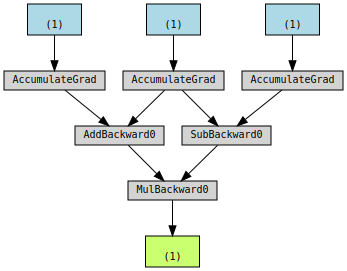

In [61]:
# визуализация графа вычислений (сумма, разность и перемножение)
from torchviz import make_dot
make_dot(f)

In [62]:
f = (x + y) * (y - z)
z = f.detach()
print(f.requires_grad, z.requires_grad)

# когда просто нужен прямой проход - и не надо считать градиенты
# делаем в таком контекстном менеджере
with torch.no_grad():
  f = (x + y) * (y - z)
print(f.requires_grad)

True False
False


In [63]:
x = torch.tensor([1., 2, 3])
w = torch.tensor([1., 1, 1], requires_grad=True)
z = w @ x
z.backward()
print((x.grad, w.grad))

(None, tensor([1., 2., 3.]))


In [64]:
z = w @ x
z.backward()
# видим, что идёт накопление градиентов при обратном проходе
# для каждого тензора как бы хранится некий счётчик градиентов
print((x.grad, w.grad))

(None, tensor([2., 4., 6.]))


In [65]:
with torch.no_grad():  # просто прямой проход (нет накопления)
  z = w @ x
  #z.backward()
print((x.grad, w.grad))

w.grad.data.zero_()  # обнуление счётчика градиентов
z = w @ x
z.backward()
print((x.grad, w.grad))

(None, tensor([2., 4., 6.]))
(None, tensor([1., 2., 3.]))


In [66]:
# w.numpy() - будет ошибка
# (запрещено переводить в numpy, если requires_grad=True)
w.detach().numpy()  # создаётся копия, которую можно в numpy
# у неё (после detach) requires_grad=False

array([1., 1., 1.], dtype=float32)

In [67]:
# Иллюстрация взятия градиента - с detach
x = torch.tensor([2.], requires_grad=True)

y = x * x
y.detach_()  # отсоединяем от графа вычислений (теперь это просто
# константная матрица)
z = x * y
z.backward()

print(x.grad)  # (2*2*x)' = 4

tensor([4.])


In [68]:
# Ещё одна иллюстрация detach()
x = torch.tensor([2.], requires_grad=True)
print(x)
print(x.detach())

tensor([2.], requires_grad=True)
tensor([2.])


In [69]:
# динамический граф вычислений в цикле
x = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float)
x0 = x
for _ in range(2):
  x = x * x  # x превращается во внутреннюю вершину графа вычислений

z = x.mean()  # здесь будет 1/4 !
z.backward()
print(x, x.grad, sep='\n')
print(x0, x0.grad, sep='\n')  # градиент лежит здесь
# а в x.grad не лежит, так как x превратился во внутреннюю вершину графа
# вычислений

tensor([[  1.,  16.],
        [ 81., 256.]], grad_fn=<MulBackward0>)
None
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor([[ 1.,  8.],
        [27., 64.]])


<ipython-input-69-a21748d1d555>:9: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(x, x.grad, sep='\n')


In [70]:
x = torch.tensor([[1., 2, 3, 4]], requires_grad=True)
z = x ** 2 / 2
loss = z.sum(dim=1)

# возможно вычислять отдельные производные по компонентам
# backward для первого элемента z
z.backward(torch.FloatTensor([[1, 0, 0, 0]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_()

tensor([[1., 0., 0., 0.]])


tensor([[0., 0., 0., 0.]])

In [71]:
# backward с равными весами для всех элементов z
z.backward(torch.FloatTensor([[1, 1, 1, 1]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_()

tensor([[1., 2., 3., 4.]])


tensor([[0., 0., 0., 0.]])

In [72]:
# обычный backward для loss
loss.backward()  # ~ loss.backward(torch.FloatTensor([1.0]))
print(x.grad.data)

tensor([[1., 2., 3., 4.]])


In [73]:
a = torch.rand(1, 4, requires_grad=True)
b = a**2
c = b * 2
d = c.mean()
e = c.sum()

# если так
d.backward(retain_graph=True)
# тут будет ошибка (RuntimeError: Trying to backward through the graph a
# second time...), если не добавлять retain_graph=True
e.backward(retain_graph=True)
# градиенты будут суммироваться

## Предобработка данных, нейросети

TensorDataset -- для представления датасета.
Часто приходится определять свой датасет, наследуя этот класс.

DataLoader -- подаёт батчами данные, позволяет итерироваться по датасету, автоматически формируя батчи (и делая некоторые сопутствующие действия).

В DataLoader может передаваться сэмплер.

In [74]:
from torch.utils.data import TensorDataset, DataLoader

x = torch.from_numpy(np.vstack([np.arange(10, dtype='float32'),
                                np.ones(10, dtype='float32')]).T)
y = torch.from_numpy(np.arange(10, dtype='float32')[:, np.newaxis] ** 2)

train_ds = TensorDataset(x, y)
train_dl = DataLoader(train_ds, batch_size=4, shuffle=True)
# хоть и batch_size=4 всё равно последний может быть более короткий
#дополнительным ключевым словом можно запретить использовать этот короткий батч

for xb, yb in train_dl:
  print(xb)
  print(yb)

tensor([[4., 1.],
        [6., 1.],
        [9., 1.],
        [3., 1.]])
tensor([[16.],
        [36.],
        [81.],
        [ 9.]])
tensor([[7., 1.],
        [5., 1.],
        [2., 1.],
        [0., 1.]])
tensor([[49.],
        [25.],
        [ 4.],
        [ 0.]])
tensor([[1., 1.],
        [8., 1.]])
tensor([[ 1.],
        [64.]])


In [75]:
# есть много вспомогательных полезных функций
# например, можно разделить датасет на части

train_size = int(0.8 * len(train_ds))
test_size = len(train_ds) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_ds,[train_size, test_size])

In [76]:
# как передать список в нейронку?

# список массивов numpy
my_x = [np.array([[1., 2], [3, 4]]), np.array([[5., 6], [7, 8]])]
# ещё один список массивов numpy (целевые значения)
my_y = [np.array([4.]), np.array([2.])]

# преобразуем в torch.Tensor
tensor_x = torch.tensor(my_x)
tensor_y = torch.tensor(my_y)

# создаём датасет
my_dataset = TensorDataset(tensor_x, tensor_y)
# создаём dataloader
my_dataloader = DataLoader(my_dataset)

<ipython-input-76-7516ba1365ff>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  tensor_x = torch.tensor(my_x)


In [77]:
# загрузка готовых датасетов (например, MNIST) с трансформациями
from torchvision import datasets, transforms

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data',
                   train=True,
                   download=True,
                   transform=transforms.Compose([
                      transforms.ColorJitter(brightness=(0.6, 1),
                                             contrast=(0.8,1)),
                      transforms.RandomRotation((-15, 15)),
                      # перевод в тензор + нормировка на отрезок
                      transforms.ToTensor(),
                      transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True, num_workers=2, pin_memory=True)

# с num_workers лучше поэкспериментировать!
# Это число подпроцессов для загрузки данных
# Чаще pin_memory=True, если используем GPU. Предварительно копирует данные
# на GPU

In [78]:
import torchvision

# трансформации можно и нужно делать разные для обучения и теста (да или нет?)
# и тест не перемешиваем

trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transforms.ToTensor())

testset = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       download=True,
                                       transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [79]:
# своя трансформация

class Noise():
  """
  Add Gaussian Noise to a tensor
  """
  def __init__(self, mean, stddev):
    self.mean = mean
    self.stddev = stddev

  def __call__(self, tensor):
    # прибавление Гауссовского шума к текущему тензору
    noise = torch.zeros_like(tensor).normal_(self.mean, self.stddev)
    return tensor.add_(noise)

  def __repr__(self):
    repr = f'{self.__class__.__name__} (mean={self.mean}, stddev={self.stddev})'
    return repr

In [80]:
# создание своего датасета

class CustomTextDataset(TensorDataset):
  """
  Simple Dataset initializes with X and y vectors
  """
  def __init__(self, X, y=None):
    self.data = list(zip(X, y))
    # Сортировка по длине нулевого элемента в кортеже
    self.data = sorted(self.data, key=lambda x: len(x[0]))

  def __len__(self):
    #raise NotImplementedError
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]

In [81]:
from torch import nn

# простейший линейный слой
model = nn.Linear(in_features=2, out_features=1, bias=True)
print(model.weight)
print(model.bias)
list(model.parameters())

Parameter containing:
tensor([[ 0.1045, -0.3301]], requires_grad=True)
Parameter containing:
tensor([0.1802], requires_grad=True)


[Parameter containing:
 tensor([[ 0.1045, -0.3301]], requires_grad=True),
 Parameter containing:
 tensor([0.1802], requires_grad=True)]

In [82]:
# простейшее задание нейронной сети
net = nn.Sequential(nn.Linear(10, 5),
                     nn.ReLU(),
                     nn.Linear(5, 2))

In [83]:
from collections import OrderedDict

# с удобными именами с помощью OrderedDict
net1 = nn.Sequential(OrderedDict([('hidden_linear', nn.Linear(10, 5)),
                                  ('hidden_activation', nn.ReLU()),
                                  ('output', nn.Linear(5, 2))]))
X = torch.rand(3, 10)

# когда делаем прямой проход, то явно не вызываем метод forward, а используем
# имя нейросети: net(X)
# так как до и после вызова неявно ещё кое-что выполняется,
# ex: _forward_pre_hooks
net(X)
# батч из трёх десятимерных объектов прошёл через нейросеть
# на выходе 3 двухмерных объекта

tensor([[-0.1452,  0.2723],
        [-0.0796,  0.3274],
        [-0.0342,  0.3743]], grad_fn=<AddmmBackward0>)

In [84]:
import torch.nn.functional as F

# простейшее задание нейронной сети в виде класса
class MLP(nn.Module):
  def __init__(self):
    # инициализация параметров
    # обращение к инициализации родителя
    super().__init__()  #super(MLP, self).__init__()
    self.hidden = nn.Linear(10, 5)  # скрытый слой
    self.out = nn.Linear(5, 2)  # выходной слой

  def forward(self, X):
    # как обрабатываются данные и получается ответ
    return self.out(F.relu(self.hidden(X)))

net2 = MLP()

In [85]:
# простейшее задание нейронной сети в виде класса
# с присоединением модулей с помощью .add_module()
# используется, когда хотим совсем немного модифицировать уже
# имеющуюся нейросеть
class NNN(torch.nn.Module):
  def __init__(self):
    super(NNN, self).__init__()

    self.layers = torch.nn.Sequential()
    self.layers.add_module('lin1', torch.nn.Linear(10, 5))
    self.layers.add_module('relu1', torch.nn.ReLU())
    self.layers.add_module('lin2', torch.nn.Linear(5, 2))

  def forward(self, input):
    return self.layers(input)

net3 = NNN()

In [86]:
net

Sequential(
  (0): Linear(in_features=10, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=2, bias=True)
)

In [87]:
net2

MLP(
  (hidden): Linear(in_features=10, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=2, bias=True)
)

In [88]:
net3

NNN(
  (layers): Sequential(
    (lin1): Linear(in_features=10, out_features=5, bias=True)
    (relu1): ReLU()
    (lin2): Linear(in_features=5, out_features=2, bias=True)
  )
)

In [89]:
# доступ к слоям и параметрам нейросети
net[0], net2.hidden, net3.layers.relu1

(Linear(in_features=10, out_features=5, bias=True),
 Linear(in_features=10, out_features=5, bias=True),
 ReLU())

In [90]:
net.state_dict()  # все параметры сети
# словарь параметров сети, в котором хранится текущее состояние сети
# его нужно сохранить, если хотим сохранить текущее состояние

OrderedDict([('0.weight',
              tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901,
                        0.0298, -0.3123],
                      [ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
                        0.2475, -0.2247],
                      [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
                       -0.1886, -0.1886]])),
             ('0.bias', tensor([ 0.2844,  0.1054,  0.3043, -0.2610, -0.3137])),
             ('2.weight',
              tensor([[-0.3499, -0.3008,  0.1811,  0.1601,  0.3716],
                      [-0.2310, -0.3049,  0.2373, -0.1808,  0.2714]])),
             ('2.bias', tensor([-0.1061

In [91]:
net[0].bias.data, net2.hidden.bias.data

(tensor([ 0.2844,  0.1054,  0.3043, -0.2610, -0.3137]),
 tensor([ 0.1657,  0.0800, -0.0031, -0.2405, -0.2709]))

In [92]:
net[0].bias.grad, net2.hidden.bias.grad
# не было обучения (Back Propagation), поэтому None

(None, None)

In [93]:
# считаем число параметров (меняющихся при обучении)
numel_list = [p.numel() for p in net.parameters() if p.requires_grad == True]
sum(numel_list), numel_list

(67, [50, 5, 10, 2])

In [94]:
# разделение параметров
# будет один и тот же блок (одинаковые веса) в нескольких позициях
shared = nn.Linear(8, 8)
net = nn.Sequential(nn.Linear(4, 8),
                    nn.ReLU(),
                    shared,
                    nn.ReLU(),
                    shared,
                    nn.ReLU(),
                    nn.Linear(8, 1))

In [95]:
# задание своих модулей (слоёв)

# центрирующий слой без параметров
class CenteredLayer(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self, X):
    return X - X.mean()

In [96]:
# явное прописывание весов
# если не сделать nn.Parameter(), то функционировать нейронка сможет, но
# она не будет обучаться (так как параметры не будут зарегистрированы как
# параметры)

class MyNetworkWithParams(nn.Module):
  def __init__(self,input_size, hidden_size, output_size):
    super(MyNetworkWithParams,self).__init__()
    # параметр автоматически регистрируется как параметр модуля
    self.layer1_weights = nn.Parameter(torch.randn(input_size, hidden_size))
    self.layer1_bias = nn.Parameter(torch.randn(hidden_size))
    self.layer2_weights = nn.Parameter(torch.randn(hidden_size, output_size))
    self.layer2_bias = nn.Parameter(torch.randn(output_size))

  def forward(self,x):
    h1 = torch.matmul(x,self.layer1_weights) + self.layer1_bias
    h1_act = torch.max(h1, torch.zeros(h1.size())) # ReLU
    output = torch.matmul(h1_act,self.layer2_weights) + self.layer2_bias
    return output

net4 = MyNetworkWithParams(32, 128, 10)

In [97]:
# со списком слоёв; их нужно хранить в nn.ModuleList() -- в этом случае
# значения в этом списке автоматически регистрируются как параметры нейронки
class MyNet(nn.Module):

  def __init__(self,n_hidden_layers):
    super(MyNet,self).__init__()
    self.n_hidden_layers = n_hidden_layers
    self.final_layer = nn.Linear(128, 10)
    self.act = nn.ReLU()
    self.hidden = []
    for i in range(n_hidden_layers):
      self.hidden.append(nn.Linear(128, 128))
    self.hidden = nn.ModuleList(self.hidden)  # это важно!

  def forward(self,x):
    h = x
    for i in range(self.n_hidden_layers):
      h = self.hidden[i](h)
      h = self.act(h)
    out = self.final_layer(h)
    return out

# PS: есть ещё nn.ModuleDict()

In [98]:
# инициализация (можно применять и по отдельным модулям)

def init_normal(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, mean=0, std=0.01)
    nn.init.zeros_(m.bias)

def init_normal_v2(m):
  if isinstance(m, nn.Linear):
    torch.nn.init.xavier_uniform_(m.weight)
    m.bias.data.fill_(0.01)

# для каждого модуля нейросети запускается функция init_normal
net.apply(init_normal)
print(net[0].weight.data[0], net[0].bias.data[0])

net.apply(init_normal_v2)
print(net[0].weight.data[0], net[0].bias.data[0])

tensor([-0.0041,  0.0016,  0.0080,  0.0009]) tensor(0.)
tensor([ 0.6209, -0.3102, -0.3821,  0.4065]) tensor(0.0100)


In [99]:
# способ, где копируются веса в нужное место
# эталонный тензор, который нужно скопировать в матрицу весов
def init_custom(m):
  if type(m) == nn.Linear:
    rw = torch.randn(m.weight.data.size())
    m.weight.data.copy_(rw)

In [100]:
# как обучать нейросеть?
# представлена функция, которая выполняет одну эпоху обучения

# в Pytorch нужно всё прописывать, а не просто fit как в sklearn

def train_epoch(model, train_loader, criterion, optimizer):
  model.train()  # входим в нужный нам режим train
  running_loss = 0.0
  # цикл по батчам
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad(set_to_none=True)  # ~ model.zero_grad()
    # = 0 чтобы не накапливались
    data = data.to(device)
    target = target.to(device)  # перенос на device
    outputs = model(data)  # получили выход сетки
    loss = criterion(outputs, target)  # посчитали для этого выхода лосс
    running_loss += loss.item()
    loss.backward()  # вычислили градиенты loss по параметрам сети (w)
    optimizer.step()  # cдалем шаг по антиградиенту - обновляем веса сети
    running_loss /= len(train_loader)
  return running_loss

In [101]:
# Loss-функции

# [S] CrossEntropyLoss = Softmax + CrossEntropy
# тот же эффект - logSoftmax + NLLLoss
loss = nn.CrossEntropyLoss()
a = torch.tensor([[1.0, 2.0, 3.0]])
y = torch.tensor([1])

print(a, y, loss(a, y))

tensor([[1., 2., 3.]]) tensor([1]) tensor(1.4076)


In [102]:
y = torch.tensor([])
preds = torch.tensor([[1]])

In [103]:
# своя Loss-функция

class CustomNLLLoss(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self, x, y):
    # x должен быть выходом из слоя LogSoftmax
    log_prob = -1.0 * x
    # Get log_prob based on y class_index as loss=-mean(ylogp)
    loss = log_prob.gather(1, y.unsqueeze(1))
    loss = loss.mean()
    return loss

criterion = CustomNLLLoss() # nn.NLLLoss()
CustomNLLLossClass = criterion(preds, y)

In [104]:
model = nn.Sequential(OrderedDict([('features', nn.Linear(10, 5)),
                                   ('hidden_activation', nn.ReLU()),
                                   ('classifier', nn.Linear(5, 2))]))

In [105]:
# свой темп для каждого слоя

from torch import optim

optim.SGD([
    {'params': model.features.parameters()},
    {'params': model.classifier.parameters(), 'lr': 1e-3}
    ], lr=1e-2, momentum=0.9)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0

Parameter Group 1
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

In [106]:
# программаторы темпов обучения (программы изменения темпов обучения)

from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau, CosineAnnealingLR

# сообщаем параметры оптимизатору!
optimizer = optim.SGD(net.parameters(), lr)

# сообщаем оптимизатор "шедьюлеру"
scheduler_1 = ReduceLROnPlateau(optimizer,
                                factor=0.1,
                                patience=1,
                                threshold=0.1)

# умножаем на gamma через каждые step_size шагов
scheduler_2 = StepLR(optimizer, step_size=1, gamma=0.1)

# ....

# шаг на эпоху должен быть один, сделаем его после валидации
if not is_train:
  scheduler_1.step(running_loss / (i + 1))
  scheduler_2.step()

NameError: ignored

In [107]:
# свой оптимизатор

class OptimizerTemplate:

  def __init__(self, params, lr):
    self.params = list(params)
    self.lr = lr

  def zero_grad(self):
    ## все градиенты обнуляем
    for p in self.params:
      if p.grad is not None:
        p.grad.detach_() # For second-order optimizers important
        p.grad.zero_()

  @torch.no_grad()
  def step(self):
    ## Apply update step to all parameters
    for p in self.params:
      if p.grad is None: # пропускаем параметры без градиентов
        continue
      self.update_param(p)

  def update_param(self, p):
    # To be implemented in optimizer-specific classes
    raise NotImplementedError

In [108]:
class SGD(OptimizerTemplate):

  def __init__(self, params, lr):
    super().__init__(params, lr)

  def update_param(self, p):
    p_update = -self.lr * p.grad
    p.add_(p_update) # In-place => saves memory + doesn't create c. graph

In [109]:
model

Sequential(
  (features): Linear(in_features=10, out_features=5, bias=True)
  (hidden_activation): ReLU()
  (classifier): Linear(in_features=5, out_features=2, bias=True)
)

In [110]:
# сохранение/загрузка сети

torch.save(model, "/tmp/model.pth")  # вся нейронка
model = torch.load("/tmp/model.pth")

torch.save(model.state_dict(), "/tmp/model.pth") # только параметры
model = nn.Sequential(OrderedDict([('features', nn.Linear(10, 5)),
                                   ('hidden_activation', nn.ReLU()),
                                   ('classifier', nn.Linear(5, 2))]))
model.load_state_dict(torch.load("/tmp/model.pth")) # только параметры
model.to(device) # вот сейчас переносим
model.eval()

Sequential(
  (features): Linear(in_features=10, out_features=5, bias=True)
  (hidden_activation): ReLU()
  (classifier): Linear(in_features=5, out_features=2, bias=True)
)

In [111]:
state = {
    'epoch': epoch + 1,
    'state_dict': net.state_dict(),
    'optimizer' : optimizer.state_dict()
}

torch.save(state, './my_checkpoint.pth')

NameError: ignored

In [112]:
# своя функция активации

@torch.jit.script
def fused_gelu(x):
  return x * 0.5 * (1.0 + torch.erf(x / 1.41421))

In [113]:
class MySigmoid (nn.Module):

  def __init__(self):
    super().__init__()
    self.name = self.__class__.__name__
    self.config = {"name": self.name}

  def forward(self, x):
    return 1 / (1 + torch.exp(-x))

In [114]:
# использование нейросетей

# валидация
model.eval() # переводим сеть в нужный режим -
# меняет поведение forward() - влияет на DO, BN
with torch.no_grad(): # контекстный менеджер, в котором не вычисляются
# градиенты, даже у тензоров с requires_grad=True
  train, y_train = train_dataset.tensors
  # train, y_train = train.to(device), y_train.to(device)
  # здесь лучше сделать цикл по dataloader, иначе model может не поместиться
  train_preds = model(train)
  train_loss = loss_fn(train_preds, y_train).item()

AttributeError: ignored

In [115]:
# Transfer Learning
# В torchvision.models есть готовые модели, см.
# https://pytorch.org/vision/stable/models.html

# берём готовую модель
from torchvision import models
transfer_model = models.resnet34(pretrained=True)
transfer_model.eval() # переводим сеть в нужный режим,
# чтобы нормально работали BN и DO

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [116]:
# заморозка слоёв (если хотим попытаться дообучить)
for name, param in model_cnn.named_parameters():
  if ("bn" not in name): # BN лучше не замораживать!
    param.requires_grad = False

NameError: ignored

In [117]:
from torchvision import models

resnet18 = models.resnet18(pretrained=True)

for parameter in resnet18.parameters(): # тут на самом деле веса,
# но не как dict
  parameter.requires_grad = False

# заменяем слой
resnet18.fc = nn.Linear(512, 10)

# если будем дообучать, то будет обучаться только resnet18.fc

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [118]:
from torchvision import models
from torchsummary import summary

vgg = models.vgg16()
vgg.to(device)
summary(vgg, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [119]:
# ещё способ посмотреть на параметры модели
from prettytable import PrettyTable

def count_parameters(model):
  table = PrettyTable(["Modules", "Parameters"])
  total_params = 0
  for name, parameter in model.named_parameters():
    if not parameter.requires_grad: continue
    params = parameter.numel()
    table.add_row([name, params])
    total_params+=params
  print(table)
  print(f"Total Trainable Params: {total_params}")
  return total_params

count_parameters(vgg)

+---------------------+------------+
|       Modules       | Parameters |
+---------------------+------------+
|  features.0.weight  |    1728    |
|   features.0.bias   |     64     |
|  features.2.weight  |   36864    |
|   features.2.bias   |     64     |
|  features.5.weight  |   73728    |
|   features.5.bias   |    128     |
|  features.7.weight  |   147456   |
|   features.7.bias   |    128     |
|  features.10.weight |   294912   |
|   features.10.bias  |    256     |
|  features.12.weight |   589824   |
|   features.12.bias  |    256     |
|  features.14.weight |   589824   |
|   features.14.bias  |    256     |
|  features.17.weight |  1179648   |
|   features.17.bias  |    512     |
|  features.19.weight |  2359296   |
|   features.19.bias  |    512     |
|  features.21.weight |  2359296   |
|   features.21.bias  |    512     |
|  features.24.weight |  2359296   |
|   features.24.bias  |    512     |
|  features.26.weight |  2359296   |
|   features.26.bias  |    512     |
|

138357544